# Dot Product to Projection to Rotation
This notebook illustrates the dot product in 2D as a projection onto a basis vector. This approach to understanding rotation is preferable to standard trigonometry heavy approaches because it develops a key intuition for establishing 2D and 3D reference frames in terms of desired directions rather than angles and trig. functions

Ross Beveridge
August 28, 2017

As will be common in these notebooks, the next sequence of commands configure options for running the notebook such as how to display math, etc.

In [9]:
%display latex
latex.matrix_delimiters(left='|', right='|')
latex.vector_delimiters(left='[', right=']')

The next block of codes create two vectors, u and v, that are each of unit length and also perpendicular (orthogona).  Already note that the direction of the 'horizontal' axis defined by the basis vector u is initially specified by picking to arbitrary scalars. Here you see what is meant above by not ever thinking about angles (no thetas here).

In [10]:
u = vector([5,-2])
u = 1/u.norm() * u
v = vector([-u[1],u[0]])
u, v

((5/29*sqrt(29), -2/29*sqrt(29)), (2/29*sqrt(29), 5/29*sqrt(29)))

Just to confirm, notice the dot product confirms orthogonality

In [11]:
v.dot_product(u)

0

To illustrate project it is handy to create object.  Specifically, a polygon defined by six points that form an asymetric shape.  This asymmetry will prove useful as we use this shape in future examples illustrating different types of 2D transformations.

In [12]:
el = matrix([[1,1],[3,1],[3,2],[2,2],[2,4],[1,4]])
el.transpose()
gel = polygon(list(el),color='green')

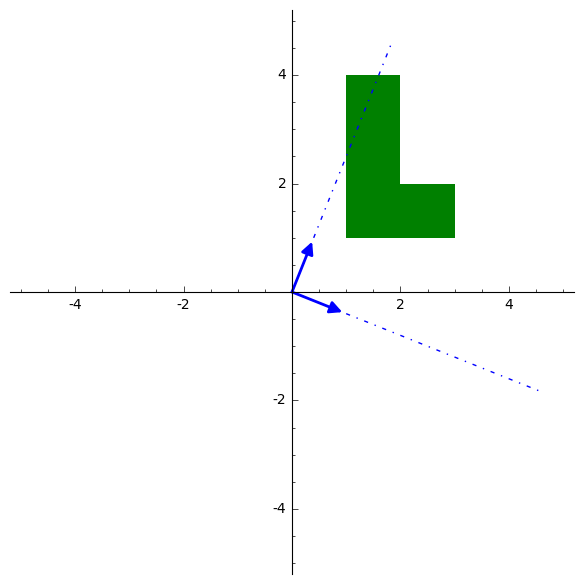

In [13]:
bnd = 5.0
gu = arrow((0,0),u)
gv = arrow((0,0),v)
gud = line([(0,0),bnd*u], linestyle="-.")
gvd = line([(0,0),bnd*v], linestyle="-.")
gos = gu + gv + gud + gvd + gel
gos.show(xmin=-bnd, ymin=-bnd, xmax=bnd, ymax=bnd, aspect_ratio=1)

We are now ready to 'see' how this polygon appears in the u,v reference frame.  That means projecting each point in the polygon onto the u and the v unit length basis vectors. But, and this is key, keep in mind that one way to compute a dot product is to multiply a row vector times a column vector.  Also, if we can do this for a single column vector, we can do it for six column vectors by placing them - one column at a time - into a matrix.  So, below you see first all the u-axis coordinates of the projected polygon and then on the next line all the v-axis coordinates of the polygon.

In [14]:
pretty_print(u,el.transpose(),"=",u*el.transpose())
pretty_print(v,el.transpose(),"=",v*el.transpose())

(5/29*sqrt(29), -2/29*sqrt(29)) [1 3 3 2 2 1]
[1 1 2 2 4 4] '=' (3/29*sqrt(29), 13/29*sqrt(29), 11/29*sqrt(29), 6/29*sqrt(29), 2/29*sqrt(29), -3/29*sqrt(29))

(2/29*sqrt(29), 5/29*sqrt(29)) [1 3 3 2 2 1]
[1 1 2 2 4 4] '=' (7/29*sqrt(29), 11/29*sqrt(29), 16/29*sqrt(29), 14/29*sqrt(29), 24/29*sqrt(29), 22/29*sqrt(29))

Only one more liner algebraic simplification.  There is no good reason to do these steps seperately.  Placing the basis vectors u and v into the top and bottom row of a matrix lets us accomplish the entire operation in a single matrix multiplication.

In [15]:
MM = matrix(2,2,[u,v])
eluv = MM*el.transpose()
pretty_print(MM,el.transpose(),"=",eluv)

[ 5/29*sqrt(29) -2/29*sqrt(29)]
[ 2/29*sqrt(29)  5/29*sqrt(29)] [1 3 3 2 2 1]
[1 1 2 2 4 4] '=' [ 3/29*sqrt(29) 13/29*sqrt(29) 11/29*sqrt(29)  6/29*sqrt(29)  2/29*sqrt(29) -3/29*sqrt(29)]
[ 7/29*sqrt(29) 11/29*sqrt(29) 16/29*sqrt(29) 14/29*sqrt(29) 24/29*sqrt(29) 22/29*sqrt(29)]

Now we can plot the polygon as it appears when the u-axis is treated as the horizontal axis and the v-axis is treated as the vertical axis.

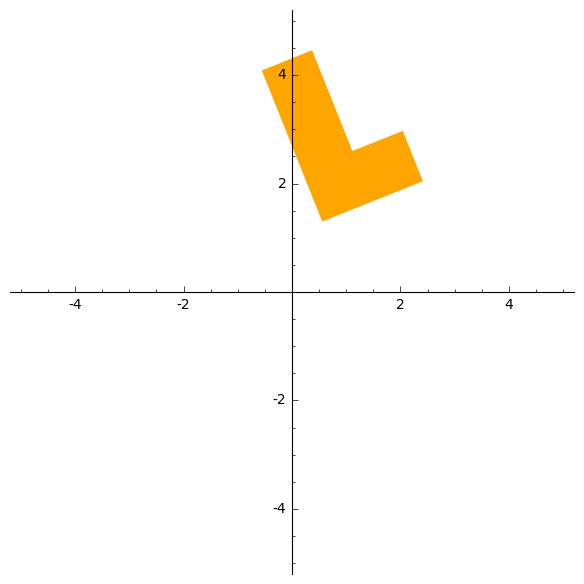

In [16]:
bnd = 5.0
gel = polygon(list(eluv.transpose()),color='orange')
gos = gel
gos.show(xmin=-bnd, ymin=-bnd, xmax=bnd, ymax=bnd, aspect_ratio=1)